# Intro to Neural Networks

In [1]:
import numpy as np
from matplotlib import pyplot as plt

mccalister = ['Adam', 'Amanda','Chum', 'Dann',
 'Jacob', 'Jason', 'Johnhoy', 'Karim',
'Leana','Luluva', 'Matt', 'Maximilian','Syd' ]

# This is always a good idea
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.student_caller import one_random_student

import warnings
warnings.filterwarnings('ignore')

# Background

Neural networks have been around for a while. They are over 70 years old, dating back to  their proposal in 1944 by Warren McCullough and Walter Pitts. These first proposed neural nets had thresholds and weights, but no layers and no specific training mechanisms.

The "Perceptron" the first trainable neural network was created by Frank Rosenblatt in 1957. It consisted of a single layer with adjustable weights in the middle of input and output layers.



![peceptron](img/nn-diagram.png)

## Inspiration from Actual Neurons

The composition of neural networks can bee **loosely** compared to a neuron.  We will be using it as an analogy to help us remember what is going on, but really, the comparison should stop there.

![neuron](img/neuron.png)

This is a loose analogy, but can be a helpful **mneumonic** (If I don't keep stressing this, my biologist sister might put out a hit on me). The inputs to our node are like inputs to our neurons.  They are either direct sensory information (our features) or input from other axons (nodes passing information to other nodes).  The body of our neuron (soma) is where the signals of the dentrites are summed together, which is loosely analogous to our **collector function**. If the summed signal is large enough (our **activation function**), they trigger an action potential which travels down the axon to be passed as output to other dentrites ([wikipedia neuron article](https://en.wikipedia.org/wiki/Neuron)). 

# Forward Propogation

Let's first look at **forward propogation** on the level of the perceptron.

We will use the built in dataset of handwritten numbers from sklearn, which comes from the UCI Machine Learning collection [digits source](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Each record is a 8 by 8 bit image of a handwritten number between 0 and 9. Each pixel value (a number between 0 and 16) represents the relative brightness of the pixel. 

In [2]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
flat_image = np.array(digits.data[0]).reshape(digits.data[0].shape[0], -1)
eight_by_eight_image = digits.images[0]

It is similar to the famous [**MNIST**](http://yann.lecun.com/exdb/mnist/index.html) dataset which is sometimes referred to the "hello world" of computer vision [source](https://www.kaggle.com/c/digit-recognizer).  

With one input of pixels from a number, our input/output process looks like so:

In [3]:
from sklearn.datasets import load_digits
import numpy as np

digits = load_digits()
eight_by_eight_image = digits.images[0]

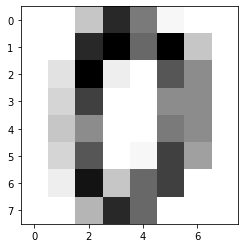

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(eight_by_eight_image, cmap='Greys')

In [5]:
# look at the matrix below and make sure you see how the large numbers 
# correspond to darker shades in the image above
eight_by_eight_image

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

When passing the data into our perceptron, we will flatten the image into a 64x1 array.

In [6]:
flat_image = np.array(digits.data[0]).reshape(digits.data[0].shape[0], -1)


In [7]:
flat_image.shape

(64, 1)

Our weights vector will have the same number of weights as pixels

![weights](img/log-reg-nn-ex-w.png)

We will instantiate our weight with small random numbers.


# Question: What shape should our weight matrix have?

In [8]:
one_random_student(mccalister)

Karim


In [51]:
w = np.random.uniform(-.1, .1, (flat_image.shape[0],1))
w[:5]

array([[ 0.09558758],
       [ 0.0242726 ],
       [-0.05891346],
       [ 0.06385455],
       [-0.0206179 ]])

We can set our bias term to 0: there is ony one for a singal perceptron

In [52]:
b = 0

![sum](img/log-reg-nn-ex-sum.png)

Our inputs, the pixel, each are multiplied by their respective weights and then summed together with the bias. 

This amounts to the dotproduct of the pixel value and the weights.


In [70]:
z = flat_image.T.dot(w) + b
z

array([[-0.93152654]])

# Question: Why do we have to transpose our flat_image?

In [54]:
one_random_student(mccalister)

Leana


In [55]:
# Answer

![activation](img/log-reg-nn-ex-a.png)

Then we pass it into an activation function. The activation function converts our summed inputs into an output, which is then passed on to other nodes in hidden layers, or as an end product in the output layer. This can looslely be thought of as the action potential traveling down the axon. 



When we build our models in Keras, we will specify the activation function of both hidden layers and output.

# Question: What is an activation function we have come across? 

In [57]:
one_random_student(mccalister)

Jacob


![don't look down](https://media.giphy.com/media/kGX9vntSO8McNlDaVj/giphy.gif)

In [58]:
# Answer

Activation functions play the role of converting our output to a specific form. The sigmoid function converts linear equation from a number that could be any number $-\infty$ to $\infty$, to a number between 0 and 1.  This conveniently allowed us to associate the output as a probability of a certain class.

In [59]:
# Z is the input from our collecter, the sum of the weights multiplied by the features and the bias

def sigmoid(z):
    '''
    Input the sum of our weights times the pixel intensities, plus the bias
    Output a number between 0 and 1.
    
    '''
    return 1/(1+np.e**(-z))

In [69]:
a = sigmoid(z)
a

array([[0.28261512]])

We have a suite of activation functions to choose from.

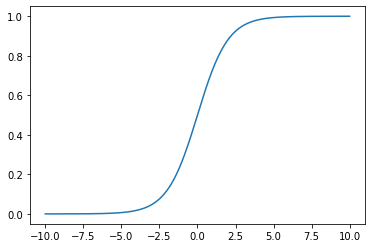

In [61]:

X = np.linspace(-10, 10, 20000)
sig = sigmoid(X)

plt.plot(X, sig);

## tanh


**tanh**: $f(x) = tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

tanh a shifted version of the sigmoid. The inflection point passes through 0,0 instead of 0,.5, and the output is between -1 and 1.  This means the mean of the output is centered around 0, which can make learning in the next layer easier.  tanh is almost always better in a **hidden layer** than the sigmoid because if speeds up learning [see here](https://stats.stackexchange.com/questions/330559/why-is-tanh-almost-always-better-than-sigmoid-as-an-activation-function). For the output layer, however, sigmoid makes sense for binary outcomes.  If we require an output of 0 or 1, it makes sense for the activation function to output between 0 and 1, rather than -1 and 1.

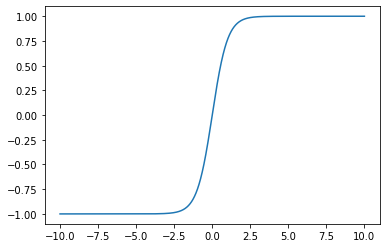

In [62]:
# Coding tanh:

X = np.linspace(-10, 10, 20000)
y_tanh = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

plt.plot(X, y_tanh);

In [63]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

In [64]:
a = tanh(z)
a

array([[-0.73130483]])

One problem with tanh (and sigmoid), is that if our input is large, then the slope of the activation function flattens out.  When conducting backpropogation, we will use the derivative of the activation function as one of our terms multiplied by a learning rate to determine how big a step to take when adjusting our weights.  If our derivative is close to zero, the step will be very small, so the speed of our learning will be very slow, which is a huge problem.  This is called the **vanishing gradient** problem.

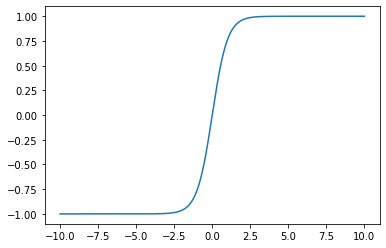

In [65]:
X = np.linspace(-10, 10, 2000)
y_tanh = (np.exp(X) - np.exp(-X)) / (np.exp(X) + np.exp(-X))

plt.plot(X, y_tanh);

# ReLU

ReLU, or rectified linear unit, outputs 0 for negative numbers, and the original value for positive inputs.  

**ReLU**: $f(x) = 0$ if $x\leq 0$; $f(x) = x$ otherwise

ReLU is a commonly used and effective activation function because of speed.  Given that the **output** is zero when negative, some nodes become inactive (i.e. produce an output of 0).  Zero outputs take little computational power. Also, the constant gradient leads to faster learning in comparison to sigmoid and tanh, which come close to 0 with large positive and negative values.  Since the speed of our network is linked to the derivative, a derivative close to zero will result in very slow learning.

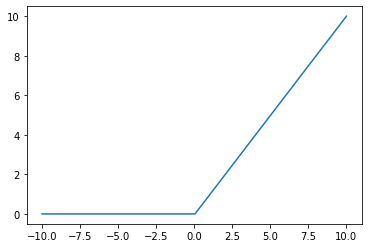

In [66]:
# Coding ReLU:

X = np.linspace(-10, 10, 200)

y_relu = list(np.zeros(100))
y_relu.extend(np.linspace(0, 10, 100))

plt.plot(X, y_relu);

In [67]:
def relu(z):
    if z <= 0:
        return 0
    else:
        return z

In [68]:
a = relu(z)
a

0

Notice that ReLU ("Rectified Linear Unit") increases without bound as $x\rightarrow\infty$. The advantages and drawbacks of this are discussed on [this page on stackexchange](https://stats.stackexchange.com/questions/126238/what-are-the-advantages-of-relu-over-sigmoid-function-in-deep-neural-networks)

There are many activation functions, [see here](https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a). 

Neural networks draw their inspiration from the biology of our own brains, which are of course also accurately described as 'neural networks'. A human brain contains around $10^{11}$ neurons, connected very **densely**.

![dense](img/dogcat.gif)

Our nodes will be taking in input from multiple sources. Let's add the entire training set as our input. 


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=42, test_size=.2)
X_train.shape

(1437, 64)

Numpy allows us to easily calculate the predictions for the set of data:

In [43]:
X_train.shape

(1437, 64)

### Question: What dimension should our weight vector now be?

In [44]:
one_random_student(mccalister)

Leana


### Question: What should be the dimension of the output of our collector function be?

In [46]:
one_random_student(mccalister)

Jacob


In [71]:
z_0 = X_train.dot(w)+b
z_0.shape


(1437, 1)

In [72]:
a_0 = sigmoid(z_0)
a_0

array([[0.6127075 ],
       [0.3560587 ],
       [0.2188547 ],
       ...,
       [0.93052149],
       [0.16394661],
       [0.9702321 ]])

In [73]:
a_0_relu = [relu(z_0) for z_0 in z_0]
a_0_relu[:10]

[array([0.45870744]),
 0,
 0,
 0,
 array([0.60877957]),
 0,
 0,
 array([0.10321636]),
 array([0.32730265]),
 0]

For our DS purposes, we'll generally imagine our network to consist of only a few layers, including an input layer (where we feed in our data) an output layer (comprising our predictions). Significantly, there will also (generally) be one or more layers of neurons between input and output, called **hidden layers**.

One reason these are named hidden layers is that what their output actually represents in not really known.  The activation of node 1 of the first hidden layer may represent a sequence of pixel intensity corresponding to a horizontal line, or a group of dark pixels in the middle of a number's loop. 

![dense](img/Deeper_network.jpg)

Because we are unaware of how exactly these hidden layers are operating, neural networks are considered **black box** algorithms.  You will not be able to gain much inferential insight from a neural net.

Let's add **one** hidden layer to our network with **four** nodes.

Each of our pixels from our digit representation goes to each of our nodes, and each node has a set of weights and a bias term associated with it.



In [74]:
# Question: what should the dimensions of our weight matrix be?

In [76]:
w_1 = np.random.normal(0,.1, (X_train.shape[1],4))
w_1.shape

(64, 4)

In [77]:
b_1 = 0

In [78]:
z_1 = X_train.dot(w_1) + b_1
z_1

array([[ 1.50347252, -5.16805187, -6.65046129, -3.77379873],
       [-0.99974564, -2.31782803, -3.24993135, -4.52351551],
       [-0.18421402,  1.31208183, -3.83192472, -4.39594412],
       ...,
       [-3.4917316 , -5.66362861, -3.14691551, -7.34895916],
       [-4.93811851, -3.89793808, -1.7056991 , -9.41723723],
       [-1.57646452, -2.48353578,  0.42800999, -1.81943631]])

In [79]:
a_1 = sigmoid(z_1)
a_1

array([[8.18091819e-01, 5.66339715e-03, 1.29175453e-03, 2.24491244e-02],
       [2.68991434e-01, 8.96571748e-02, 3.73293542e-02, 1.07343342e-02],
       [4.54076290e-01, 7.87861312e-01, 2.12083315e-02, 1.21771261e-02],
       ...,
       [2.95484096e-02, 3.45790451e-03, 4.12129877e-02, 6.42848022e-04],
       [7.11705678e-03, 1.98804429e-02, 1.53722395e-01, 8.13037400e-05],
       [1.71296776e-01, 7.70204734e-02, 6.05398373e-01, 1.39501525e-01]])

Now each of these neurons has a set of weights and a bias associated with it.

### What is the shape of this weight matrix?

In [80]:
one_random_student(mccalister)

Leana


In [82]:
w_1 = np.random.normal(0,.1, (a_1.shape[1],1))

w_1.shape

(4, 1)

In [83]:
b_1 = 0

In [84]:
z_1 = a_1.dot(w_1)

In [85]:
output = sigmoid(z_1)
y_pred = output > .5
y_hat = y_pred.astype(int)
y_hat[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

## Back propagation

After a certain number of data points have been passed through the model, the weights will be *updated* with an eye toward optimizing our loss function. (Thinking back to biological neurons, this is like revising their activation potentials.) Typically, this is  done  by using some version of gradient descent.

![bprop](img/BackProp_web.png)

### Loss Function

The loss function tells us how well our model performed by comparing the predictions to the actual values.

When we train our models with Keras, we will watch the loss function's progress across epochs.  A decreasing loss function will show us that our model is **improving**.

The loss function is associated with the nature of our output. In logistic regression, our output was binary, so our loss function was the negative loglikelihood, aka **cross-entropy**.

$$ \Large -\ loglikelihood = -\frac{1}{m} * \sum\limits_{i=1}^m y_i\log{p_i} + (1-y_i)\log(1-p_i) $$
    

In [86]:
y_train = y_train %2 

In [87]:
y_train*np.log(output) + (1-y_train) * np.log(1-output)

array([[-0.69847168, -0.69847168, -0.69847168, ..., -0.69847168,
        -0.68785088, -0.68785088],
       [-0.69918663, -0.69918663, -0.69918663, ..., -0.69918663,
        -0.68714398, -0.68714398],
       [-0.72831084, -0.72831084, -0.72831084, ..., -0.72831084,
        -0.65917812, -0.65917812],
       ...,
       [-0.69445512, -0.69445512, -0.69445512, ..., -0.69445512,
        -0.69184095, -0.69184095],
       [-0.69765929, -0.69765929, -0.69765929, ..., -0.69765929,
        -0.68865534, -0.68865534],
       [-0.70831407, -0.70831407, -0.70831407, ..., -0.70831407,
        -0.67820689, -0.67820689]])

In [88]:
neg_ll = -1/len(y_train)*np.sum(y_train*np.log(output) + (1-y_train) * np.log(1-output))
neg_ll

996.1167068048533

For continuous variables, the loss function we have relied on is [MSE or MAE](http://rishy.github.io/ml/2015/07/28/l1-vs-l2-loss/).

Good [resource](https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/) on backpropogation with RMSE loss function.

Here is a good summary of different [loss functions]( https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html):
   

# Gradient Descent, Epochs, and Batches

We not only use the the loss function to see our model is improving, we use it to update our parameters.  The gradient of the loss function is calculated in relation to each parameter of our neural net.

$$\large dw_1 = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d w_1} = \displaystyle\frac{d\mathcal{L}(\hat y , y)}{d \hat y}\displaystyle\frac{d\hat y}{dz}\displaystyle\frac{dz}{d w_1} = x_1 dz $$

Working through the Learn's Intro to Neural Networks will allow you to dive deep into the partial derivatives. For now, I will just point out that the derivative of the weight is multiplied by the derivative of our activation function, *$d\hat{y}$*.  Here you can get a glimpse of the problem with the sigmoid/tanh as an activation function for a hidden layer.  Since the derivative of the sigmoid approaches zero for very large positive or negative numbers, the update to the parameters (the partial derivative multiplied by a learning rate ($ \alpha $)) approaches zero.

$$w_1 := w_1 - \alpha dw_1$$

The speed of our neural net goes way down as a result, since the updates are so incrementally small.

For a deep dive into the fitting process, reference Chapter 11 in [Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/printings/ESLII_print12.pdf)

Gradient descent can be performed in several different ways.  Unlike sklearn implimentation of linear regression, which finds the minimum of the loss with a closed form solution, neural networks move down the gradient **incrementally.**  

When we run our neural nets in Keras, we can set the hyperparameter verbose equal to 1, and we will see progress through **epochs**

![epoch](img/2014-10-28_anthropocene.png)

At the end of each epoch, **all examples** from are training set have passed through the network.

Different types of gradient descent update the parameters at different times.

### Batch Gradient Descent

The gradient is calculated across all values.  We can find the direction of the gradient, and proceed directly towards the minimum .

The weights are updated with regard to the cost at the **end of an epoch** after all training elements have passed through.

### Stochastic Gradient Descent

Updating the weights after all training examples have passed through can be detrimentally slow.  

SGD updates the weights after each training example. SGD requires less epochs to achieve quality coefficients. This speeds up gradient descent significantly [link](https://machinelearningmastery.com/gradient-descent-for-machine-learning/).

### Mini-Batch Gradient Descent

In mini-batch, we pass a batch, calculated the gradient, update the params, then proceed to the next batch.  It combines the advantages of batch and stochastic gradient descent: it is more faster than SGD since the updates are not made with each point, and more computationally efficient than batch, since all training examples don't have to fit in memory.

[Good comparison of types of Gradient Descent and batch size](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

> Tip 1: A good default for batch size might be 32.  
    - batch size is typically chosen between 1 and a few hundreds, e.g. batch size = 32 is a good default value, 



# Optimizers

One of the levers we can tweek are the optimizers which control how the weights and biases are updated.

For stochastic gradient descent, the weights are updated with a **constant** learning rate (alpha) after every record.  If we specify a batch size, the constant learning rate is multiplied by the gradient across the batch. 

Other optimizers, such as **Adam** (not an acronym) update the weights in different ways. For Adam,
> A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds. [source](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) 





To be clear, backpropogation calculates the gradient for each weight and bias, in each layer, including the input layer, for each **batch**.

So, to be clear:

For mini-batch gradient descent, we:
    - pass in a specified random sample of our training set
    - the set propogates forward through our network
    - each node sums the input, adds a bias, and applies an activation function to pass to the next layer.
    - We make predictions on the output layer, then calculate the loss for back propogation.
    - We calculate the derivative of the loss with regard to each weight and bias.
    - We multiply that derivative by a learning rate determined by our optimizer.
    - We update our parameters.
    - We repeat for each batch until all examples have been used.
    - We progress to the next epoch.
 



![backprop](img/ff-bb.gif)

The graphic above can be a bit frustrating since it moves fast, but follow the progress as so:

Forward propogation with the **blue** tinted arrows computes the output of each layer: i.e. a summation and activation.

Backprop calculates the partial derivative (**green** circles) for each weight (**brown** line) and bias.

Then the optimizer multiplies a **learning rate** ($\eta$) to each partial derivative to calculate a new weight which will be applied to the next batch that passes through.